In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import random

In [2]:
labels = ['ar', 'de', 'en']
# img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img),0) 
                resized_arr = cv2.resize(img_arr, (250, 64)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)


In [3]:
dataset_dir ='/Users/ahmedwasfy/Documents/Dataset2'
train_set = get_data(dataset_dir)
np.random.shuffle(train_set)
print("Data retrieved")

OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.5.1) ../modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Data retrieved


In [4]:
X = np.array([img[0] for img in train_set] )/255
print("X is done")
X = X.reshape(-1, 64, 250 , 1)
y = np.array([img[1] for img in train_set])
print('Y is done')

X is done
Y is done


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print("test set done")
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
print('Validation set done')

test set done
Validation set done


In [6]:
print(X_train.shape)
print(X_train.shape[1])
print(X_train.shape[2])
print(len(X_train))
print(len(X_validation))

(27785, 64, 250, 1)
64
250
27785
6947


In [8]:
model = keras.Sequential()
weight_decay = 0.00001
input_shape = (X_train.shape[1], X_train.shape[2], 1)


    # 1st conv layer
model.add(layers.Conv2D(32, (7, 7), activation='elu', input_shape=input_shape, padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
model.add(layers.BatchNormalization())

    # 2nd conv layer
model.add(layers.Conv2D(64, (5, 5), activation='elu', padding='same'))
model.add(layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
# , kernel_regularizer=regularizers.l1(weight_decay)
model.add(layers.BatchNormalization())

#     # 3rd conv layer
model.add(layers.Conv2D(128, (3, 3), activation='elu', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
model.add(layers.BatchNormalization())

# 4th conv layer
model.add(layers.Conv2D(256, (3, 3), activation='elu', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
# model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())

# 5th conv layer

model.add(layers.Conv2D(512, (3, 3), activation='elu', padding='same'))
model.add(layers.MaxPool2D((2, 2), strides=(2, 2), padding='same'))
model.add(layers.BatchNormalization())




    # flatten output and feed it into dense layer
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='elu'))
model.add(layers.Dropout(0.5))

    # output layer
model.add(layers.Dense(3, activation='softmax'))

In [9]:
optimiser = keras.optimizers.Adam(learning_rate=0.001, amsgrad=True)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 250, 32)       1600      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 125, 32)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 125, 32)       128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 125, 64)       51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 63, 64)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 63, 64)        256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 63, 128)      

In [10]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [11]:
 history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=25, 
                     epochs=40,
                     shuffle=True)

2021-08-05 15:14:40.050895: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-05 15:14:40.053231: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/40
1112/1112 [==============================] - 241s 216ms/step - loss: 2.3544 - accuracy: 0.4160 - val_loss: 2.2242 - val_accuracy: 0.3712
Epoch 2/40
1112/1112 [==============================] - 239s 215ms/step - loss: 0.9270 - accuracy: 0.6142 - val_loss: 1.1730 - val_accuracy: 0.5964
Epoch 3/40
1112/1112 [==============================] - 240s 216ms/step - loss: 0.7103 - accuracy: 0.7280 - val_loss: 0.7886 - val_accuracy: 0.6797
Epoch 4/40
1112/1112 [==============================] - 240s 216ms/step - loss: 0.5755 - accuracy: 0.7878 - val_loss: 2.9896 - val_accuracy: 0.4075
Epoch 5/40
1112/1112 [==============================] - 241s 216ms/step - loss: 0.4745 - accuracy: 0.8298 - val_loss: 0.5684 - val_accuracy: 0.8117
Epoch 6/40
1112/1112 [==============================] - 237s 213ms/step - loss: 0.4024 - accuracy: 0.8569 - val_loss: 0.8564 - val_accuracy: 0.7819
Epoch 7/40
1112/1112 [==============================] - 236s 212ms/step - loss: 0.2826 - accuracy: 0.9001 - val_

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

121/121 - 7s - loss: 0.7465 - accuracy: 0.9080

Test accuracy: 0.9080311059951782


In [13]:
model.save('best_model_3_Langs.h5')

40
40


Text(0.5, 1.0, 'Training and Validation loss')

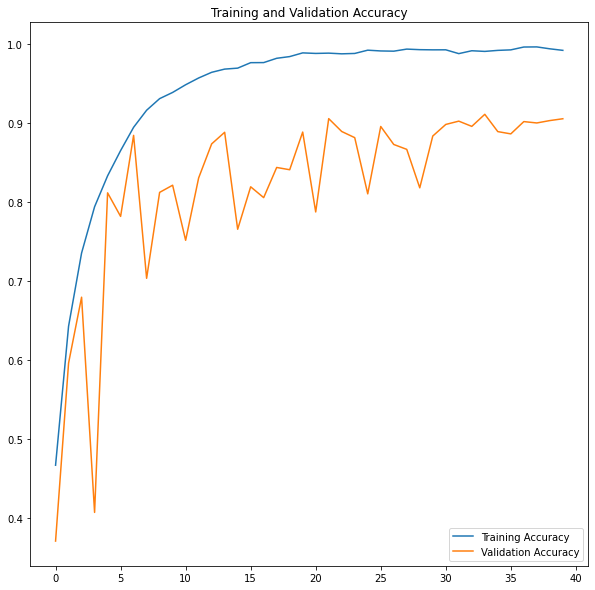

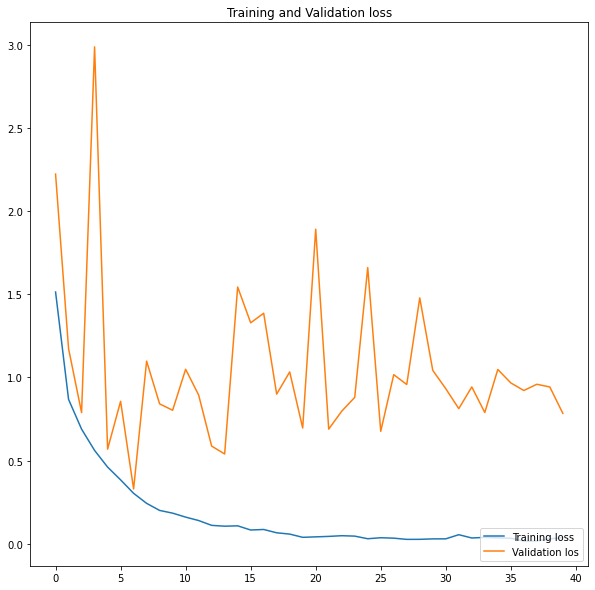

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(40)
print(len(acc))
print(len(val_acc))
plt.figure(figsize=(10, 10))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.figure(figsize=(10, 10))
plt.plot(epochs_range, loss, label='Training loss')
plt.plot(epochs_range, val_loss, label='Validation los')
plt.legend(loc='lower right')
plt.title("Training and Validation loss")

In [15]:
from sklearn.metrics import confusion_matrix


In [16]:
predictions = model.predict(X_test)

In [17]:
print(predictions)

[[1.0000000e+00 2.7937409e-12 1.8309392e-09]
 [8.5206550e-05 9.9991477e-01 1.5448450e-08]
 [1.2081014e-40 1.7053802e-42 1.0000000e+00]
 ...
 [1.5574436e-07 9.9999988e-01 2.1684674e-12]
 [9.4313590e-10 1.0000000e+00 1.8141136e-10]
 [2.4588304e-03 1.0021958e-02 9.8751915e-01]]


In [18]:
classes = np.argmax(predictions, axis = 1)
print(classes)

[0 1 2 ... 1 1 2]


In [19]:
cf_matrix = confusion_matrix(classes, y_test)

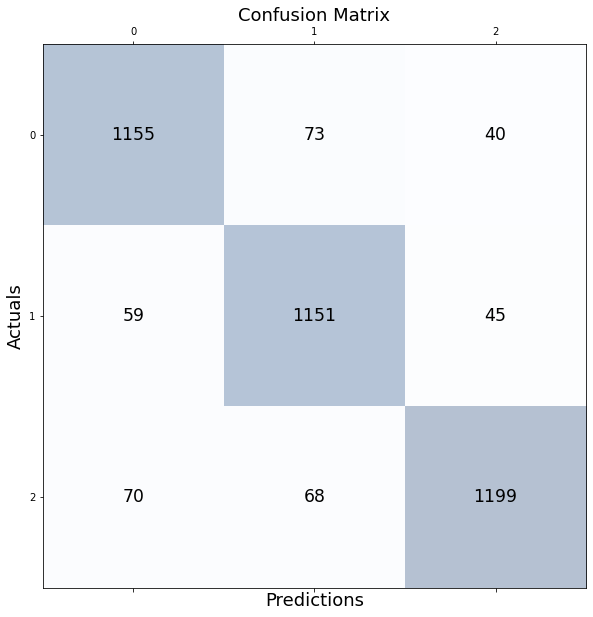

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        ax.text(x=j, y=i,s=cf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [21]:
print(len(y_test))

3860
